# Project - Book Recommendation

## EDA

In [2]:
!pip install isbntools


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.4 MB/s eta 0:00:00


In [3]:
!pip install dataprep

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 57.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is still looking at multiple versions of 

In [1]:
#Importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from isbntools.app import *
import json
from dataprep.clean import clean_country
import pickle
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance_matrix
from scipy.spatial.distance import euclidean, pdist, squareform
from scipy import sparse
import math
import sklearn.metrics
from sklearn.metrics import mean_absolute_error
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the books dataset and seeing the result for first five rows
books=pd.read_csv("Books.csv")
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Reading the ratings dataset and seeing the result for first five rows
ratings=pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
# Reading the users dataset and seeing the result for first five rows
users=pd.read_csv("Users.csv")
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# dimension of dataset
print(f'''Book_df shape is {books.shape}
Ratings_df shape is {ratings.shape}
Users_df shape is {users.shape}''')

Book_df shape is (271360, 8)
Ratings_df shape is (1149780, 3)
Users_df shape is (278858, 3)


#### Books Dataset

In [7]:
#First 5 rows in books dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
#Information about the books datset
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
#Analyzing the reason for object datatype on Year-Of-Publication feature
books_YOP = list(books['Year-Of-Publication'].unique())

#Finding if there are any string in Year-Of-Publication
for yop in books_YOP:
    try:
        int(yop)
    except ValueError as e:
        print(e)

invalid literal for int() with base 10: 'DK Publishing Inc'
invalid literal for int() with base 10: 'Gallimard'


***Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset.***

In [10]:
# Finding the rows having 'DK Publishing Inc'or "Gallimard" as yearOfPublication
books.loc[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [11]:
# finding the rows in Image-URL-L that contains the NA and handing the values accordingly
NA_rows = books[['Image-URL-L']].isna().all(axis=1)
books.loc[NA_rows, 'Book-Author':'Image-URL-L'] = books.loc[NA_rows, 'Book-Author':'Image-URL-L'].shift(1, axis=1)
books.loc[(books['ISBN'] == '078946697X') | (books['ISBN'] == '2070426769') | (books['ISBN'] == '0789466953')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",None,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",None,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",None,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [12]:
# Filling the empty rows of Book-Author in 078946697X, 2070426769 and 0789466953
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"

In [13]:
# Converting Year-Of-Publication from object to int
books['Year-Of-Publication']=books['Year-Of-Publication'].astype(int)

In [14]:
#Finding the max and min of Year-Of-Publication
books['Year-Of-Publication'].describe()

,Year-Of-Publication
count,271360.000000
mean,1959.761273
std,257.992836
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


In [15]:
# Finding the total no of rows having yearOfPublication as 0 or greater than 2024
print("No of books showing Year of publication as 0 or greater then 2024 - ",len(books.loc[(books['Year-Of-Publication'] == 0) | (books['Year-Of-Publication'] > 2024)]))

No of books showing Year of publication as 0 or greater then 2024 -  4630


In [16]:
#Finding the list of ISBN whose yearOfPublication is 0 or greater than 2024
isbn_list_1 = books.loc[(books['Year-Of-Publication'] == 0) | (books['Year-Of-Publication'] > 2024)]['ISBN'].to_list()

**The below function is created to retrieve the correct yearOfPublication for ISBN whose year of yearOfPublication in dataset is 0 or greater than 2024.**

***It's using a library called isbntools - https://pypi.org/project/isbntools/ which contain meta function. When ISBN is passed as an argument to the meta function it gives the details of that book in return like title, publication, author and yearOfPublication.***

In [17]:
# Using the isbntools.app package to find the correct yearOfPublication using ISBN Id
# Long running code
'''isbn_year_dict={}
for each in isbn_list_1:
    try:
        isbn_year_dict[each]=meta(each)['Year']
    except:
        continue'''

"isbn_year_dict={}\nfor each in isbn_list_1:\n    try:\n        isbn_year_dict[each]=meta(each)['Year']\n    except:\n        continue"

In [18]:
'''# Convert isbn_year_dict set to JSON object and and write to a file.
with open("Datasets/isbn_year_dict.json", "w") as outfile:
    json.dump(isbn_year_dict, outfile)'''


'# Convert isbn_year_dict set to JSON object and and write to a file.\nwith open("Datasets/isbn_year_dict.json", "w") as outfile: \n    json.dump(isbn_year_dict, outfile)'

In [21]:
# Reading the isbn_year_dict json containing the isbn Id and YOP
with open('isbn_year_dict.json') as json_file:
    isbn_year_dict = json.load(json_file)

In [22]:
# Replace the 0 and greater than 2024 YOP with correct values
for each in isbn_list_1:
    try:
        yop=int(isbn_year_dict[each])
        books.loc[books.ISBN == each,'Year-Of-Publication'] = yop
    except:
        yop=int(books['Year-Of-Publication'].median())
        books.loc[books.ISBN == each,'Year-Of-Publication'] = yop

In [23]:
# Finding the null values
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,1
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [24]:
# Looking for NaN in Author
books[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [25]:
# Adding the missing Book-Author
books.loc[books.ISBN == '0751352497','Book-Author'] = meta('0751352497')['Authors']
books.loc[books.ISBN == '9627982032','Book-Author'] = meta('9627982032')['Authors'][2]


In [26]:
# Looking for NaN in Publisher
books[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [27]:
# Adding the missing Publisher
books.loc[books.ISBN == '193169656X','Publisher'] = meta('193169656X')['Publisher']
books.loc[books.ISBN == '1931696993','Publisher'] = meta('1931696993')['Publisher']

In [28]:
# checking for null values
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [29]:
# checking for duplicate values
books.duplicated().sum()

0

#### Users Dataset

In [30]:
#First 5 rows in users dataset
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [31]:
# Shape of users dataset
users.shape

(278858, 3)

In [32]:
# Information of users dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [33]:
# Checking missing value
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [34]:
# finding Unique values in users
print(f'unique value in age: ', users['Age'].nunique())
print(f'unique value in Location: ', users['Location'].nunique())

unique value in age:  165
unique value in Location:  57339


In [35]:
#Extract country value out of the location column
users['Country'] = users['Location'].str.split(',', expand=True)[2]

In [36]:
# seeing the fisrt 10 rows of users table
users.head(10)

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom
5,6,"santa monica, california, usa",61.0,usa
6,7,"washington, dc, usa",NaN,usa
7,8,"timmins, ontario, canada",NaN,canada
8,9,"germantown, tennessee, usa",NaN,usa
9,10,"albacete, wisconsin, spain",26.0,spain


In [37]:
# drop location column
users.drop('Location',axis=1,inplace=True)

In [38]:
#Checking Country column
print(set(users.Country.unique()))

{'', ' l`italia', ' dominica', 'yamunanagar', ' v region', ' \\"n/a\\""', ' antigua and barbuda', ' noord-brabant', ' somewherein space', ' ä¸\xadå?½', ' france', ' in your heart', ' australia', ' citrus.', ' l', ' unit', ' guyana', 'jawa-tengah', ' serbia & montenegro', '4main', ' ethiopia', ' belgique', ' de', ' berlin', ' thane', ' bvi', ' normandy', ' st.thomasi', 'leyte', ' france"', ' alberta', ' western australia', ' south africa', ' bosnia', ' el general carlos ibañes del campo.', ' turkey', ' cote d`ivoire', ' bademn würtemberg', ' bbbzzzzz', ' vicenza', 'c.t.', ' western cape', ' us', '61 men', ' new brunswick', ' hb', ' my', ' lithuania"', ' côte d', ' okinawa', ' mugla', ' indonesia"', ' central java/jawa tengah', ' seoul', ' veneto', ' kosovo', ' la chine éternelle !', 'behind omident petrol', ' vietnam', ' dc', ' maryland', ' heard of it? :o)', ' 01776', ' iraq', ' balcistsa', ' hillsborough', ' korea', ' mordor', 'pakistan', ' moçambique', 'india', ' micronesia', ' fiji'

**From above cell results it's clear that country column data contains some incorrect values and empty values.**

**Below line uses an package called dataprep - https://pypi.org/project/dataprep/ to clean and standardize a column of country names.**

***If matching country is not present it will replaced with NAN which than replaced with Others as an String.***

In [39]:
# CLeaning the Country column with correct data
users = clean_country(users, "Country")

Country Cleaning Report:
	272088 values cleaned (97.57%)
	2065 values unable to be parsed (0.74%), set to NaN
Result contains 272088 (97.57%) values in the correct format and 6770 null values (2.43%)


In [40]:
#Checking the null values in Country Columns and replacing with others
users.loc[users['Country_clean'].isna(), 'Country_clean'] = "Others"
users.drop(columns=['Country'], inplace=True)
users.rename(columns = {'Country_clean':'Country'}, inplace = True)
users.head(10)

,User-ID,Age,Country
0,1,NaN,United States
1,2,18.0,United States
2,3,NaN,Russia
3,4,17.0,Portugal
4,5,NaN,United Kingdom
5,6,61.0,United States
6,7,NaN,United States
7,8,NaN,Canada
8,9,NaN,United States
9,10,26.0,Spain


In [41]:
#Checking the min and max for Age Column
users['Age'].describe()

,Age
count,168096.000000
mean,34.751434
std,14.428097
min,0.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,244.000000


***Age value's below 5 and above 100 do not make any case. Replacing by NaNs is logical.***

In [42]:
#No of null values in Age Columns
users['Age'].isna().sum()

110762

**The number of null values is very high in Age column. Along with that it also contain some values inaccurate to our recommendation engine.**

**For now replacing this inaccurate and NAN values median. At later stage will decide to drop the Age Column.**

In [43]:
# Replacing the Age data below 5 and above 100 with NaN
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [44]:
#Filling the NAN values with median on the basis of Country
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

In [45]:
#Filling the left NAN values with overall median
users['Age'] = users['Age'].fillna(users['Age'].median())

In [46]:
# checking for duplicate values
users.duplicated().sum()

0

#### Ratings Dataset

In [47]:
#First 5 rows in ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [48]:
# Checking for any null vlaues
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [49]:
# checking for duplicate values
ratings.duplicated().sum()

0

In [50]:
#Information on the ratings dataset
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Merging All Datasets

In [51]:
#Merging all 3 datasets in one
books_final_df = users.copy()
books_final_df = books_final_df.merge(ratings,on="User-ID")
books_final_df = books_final_df.merge(books,on="ISBN")

In [52]:
# Seeing the first 5 results of merge table
books_final_df.head()

,User-ID,Age,Country,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,18.0,United States,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,33.0,Canada,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,49.0,Canada,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,32.0,Others,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,33.0,Canada,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [53]:
#Information on final merge table
books_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Age                  1031136 non-null  float64
 2   Country              1031136 non-null  object 
 3   ISBN                 1031136 non-null  object 
 4   Book-Rating          1031136 non-null  int64  
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031136 non-null  object 
 7   Year-Of-Publication  1031136 non-null  int64  
 8   Publisher            1031136 non-null  object 
 9   Image-URL-S          1031136 non-null  object 
 10  Image-URL-M          1031136 non-null  object 
 11  Image-URL-L          1031136 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 102.3+ MB


In [54]:
#Checking if any null values in final table
books_final_df.isna().sum()

,0
User-ID,0
Age,0
Country,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0


In [55]:
#Shape of the final dataset
books_final_df.shape

(1031136, 12)

In [57]:
# Saving the final df into a csv file
books_final_df.to_csv("books_final_df.csv", index=False)

#### Visualization

In [58]:
# Copying the above books_final_df
books_final = books_final_df.copy()

Text(0.5, 1.0, 'Number of Users Country wise')

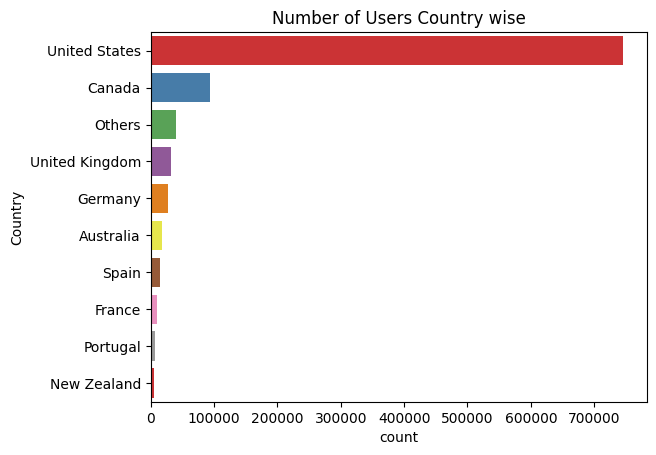

In [59]:
# Top 10 Countries having most users.
sns.countplot(y='Country',data=books_final,order=pd.value_counts(books_final['Country']).iloc[:10].index, palette = "Set1")
plt.title('Number of Users Country wise')

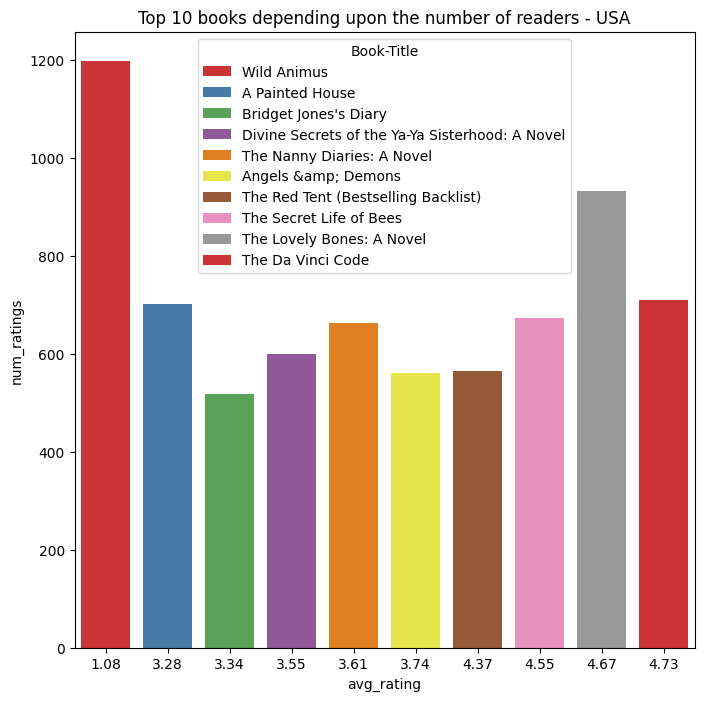

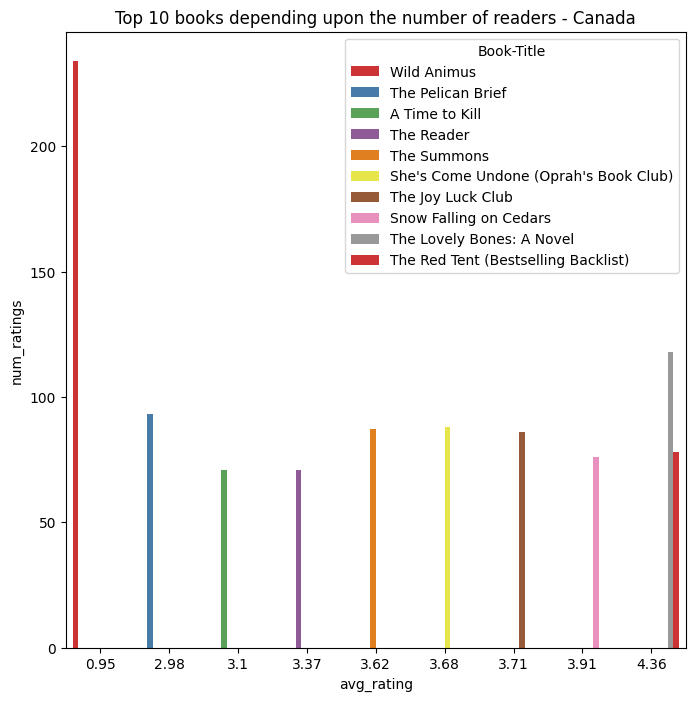

In [60]:
# Top 10 books on USA and Canada depending upon num of readers
books_countryWise =  pd.DataFrame(books_final.groupby(['Country', 'Book-Title'], as_index=False).agg({'User-ID': 'count', 'Book-Rating': 'mean'}))
books_countryWise.rename(columns = {'User-ID':'num_ratings', 'Book-Rating':'avg_rating'}, inplace = True)
books_countryWise.avg_rating = books_countryWise.avg_rating.round(2)
books_countryWise_USA = books_countryWise[books_countryWise['Country'] == "United States"].sort_values('num_ratings', ascending=False)[0:10]
plt.subplots(figsize=(8, 8))
sns.barplot(y = 'num_ratings', x='avg_rating', data=books_countryWise_USA, palette = "Set1", hue='Book-Title')
plt.title('Top 10 books depending upon the number of readers - USA')
plt.show()

books_countryWise_Canada = books_countryWise[books_countryWise['Country'] == "Canada"].sort_values('num_ratings', ascending=False)[0:10]
plt.subplots(figsize=(8, 8))
sns.barplot(y = 'num_ratings', x='avg_rating', data=books_countryWise_Canada, palette = "Set1", hue='Book-Title')
plt.title('Top 10 books depending upon the number of readers - Canada')
plt.show()

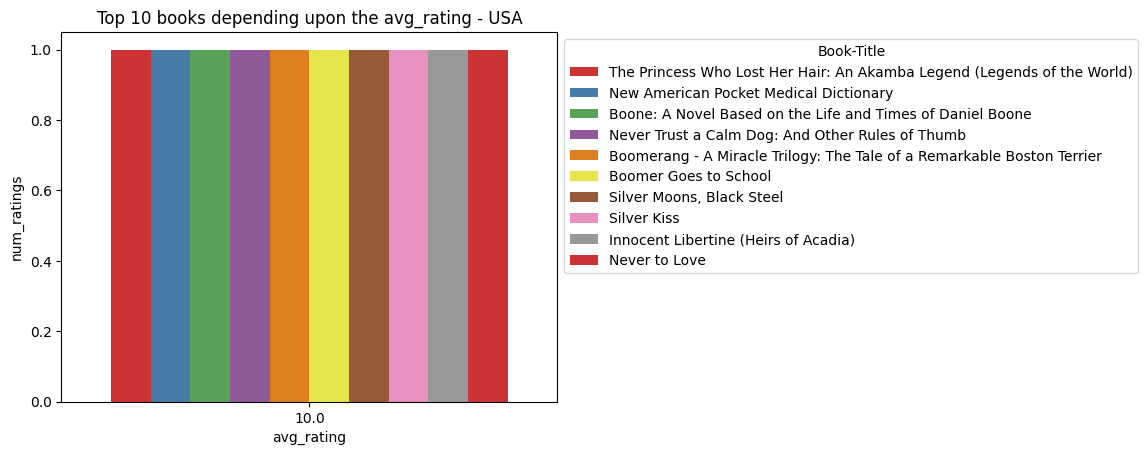

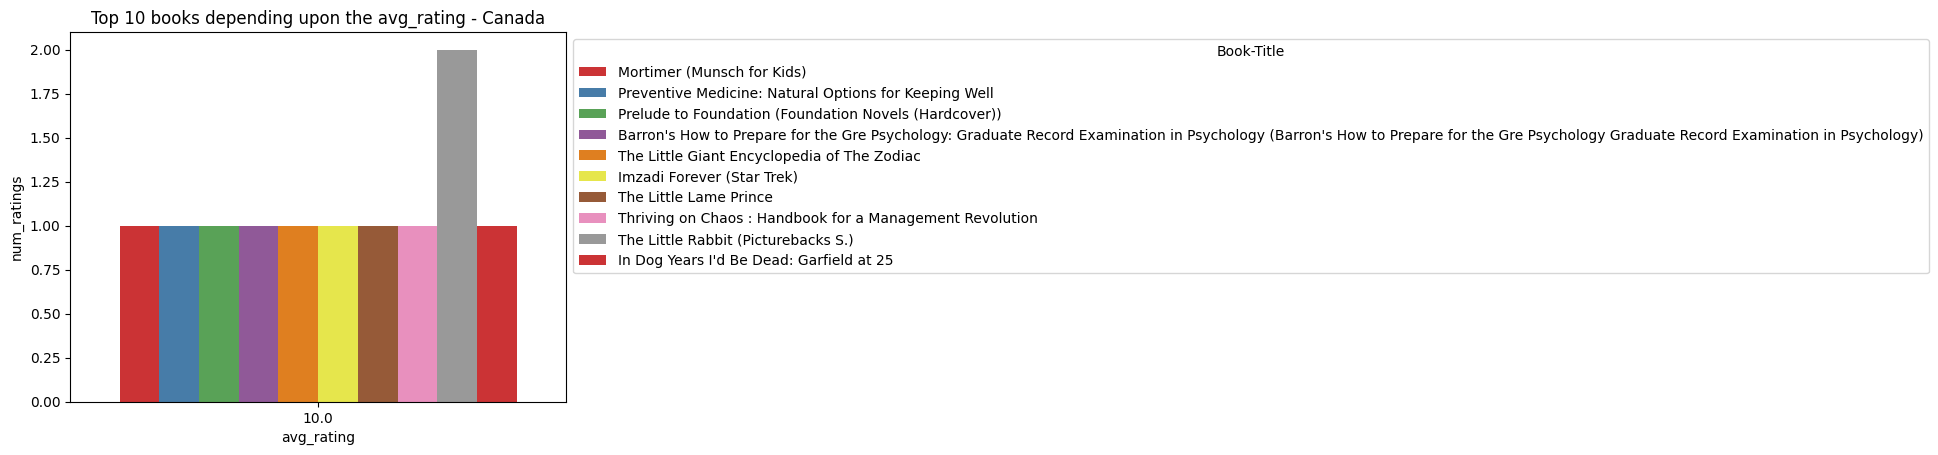

In [61]:
# Top 10 books read on USA and Canada depending upon avg_rating
books_countryWise_USA = books_countryWise[books_countryWise['Country'] == "United States"].sort_values('avg_rating', ascending=False)[0:10]
ax= sns.barplot(y = 'num_ratings', x='avg_rating', data=books_countryWise_USA, palette = "Set1", hue='Book-Title')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Top 10 books depending upon the avg_rating - USA')
plt.show()

books_countryWise_Canada = books_countryWise[books_countryWise['Country'] == "Canada"].sort_values('avg_rating', ascending=False)[0:10]
ax= sns.barplot(y = 'num_ratings', x='avg_rating', data=books_countryWise_Canada, palette = "Set1", hue='Book-Title')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Top 10 books depending upon the avg_rating - Canada')
plt.show()

Text(0.5, 1.0, 'Top 10 Publishers')

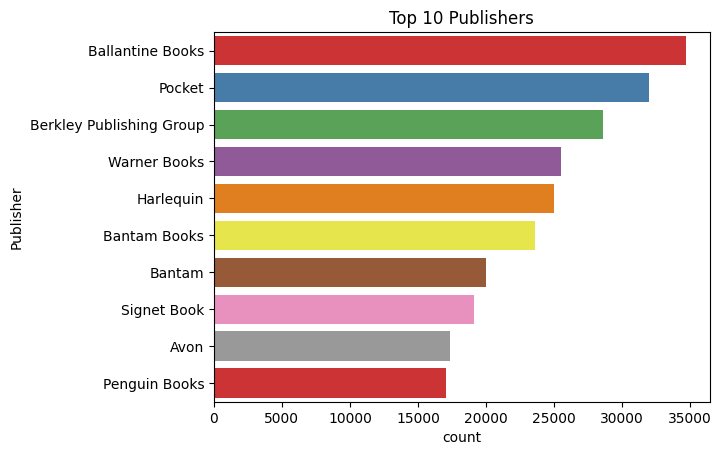

In [62]:
# Top 10 Publisher which have published the most books.
sns.countplot(y='Publisher',data=books_final,order=pd.value_counts(books_final['Publisher']).iloc[:10].index, palette = "Set1")
plt.title('Top 10 Publishers')

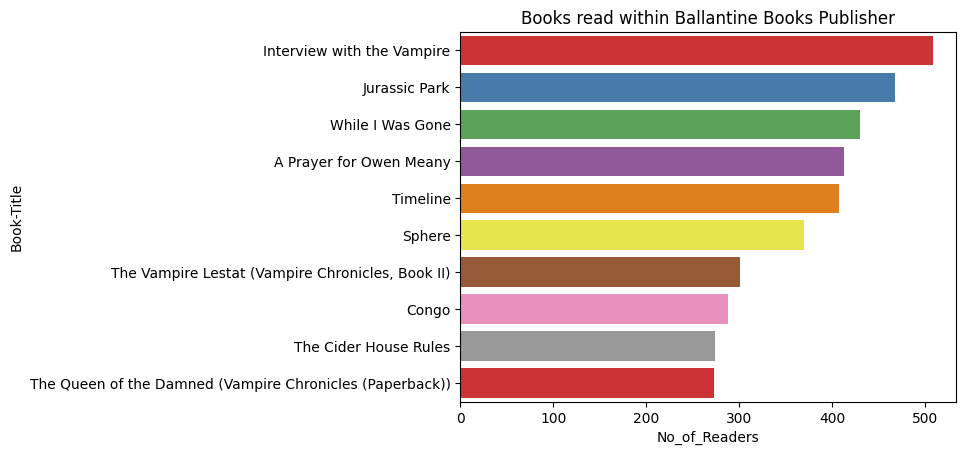

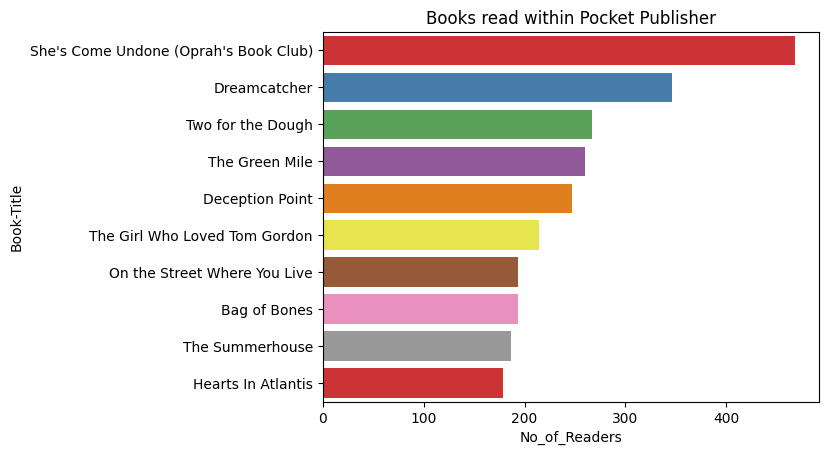

In [63]:
# Top 10 books read within Ballantine Books and Pocket Publisher.
books_publisherWise =  pd.DataFrame(books_final.groupby(['Publisher', 'Book-Title'], as_index=False)['Book-Title'].size())
books_publisherWise.rename(columns = {'size':'No_of_Readers'}, inplace = True)
books_publisherWise_Ballantine = books_publisherWise[books_publisherWise['Publisher'] == "Ballantine Books"].sort_values('No_of_Readers', ascending=False)[0:10]
sns.barplot(y = 'Book-Title', x='No_of_Readers', data=books_publisherWise_Ballantine, palette = "Set1")
plt.title('Books read within Ballantine Books Publisher')
plt.show()

books_publisherWise_Pocket = books_publisherWise[books_publisherWise['Publisher'] == "Pocket"].sort_values('No_of_Readers', ascending=False)[0:10]
sns.barplot(y = 'Book-Title', x='No_of_Readers', data=books_publisherWise_Pocket, palette = "Set1")
plt.title('Books read within Pocket Publisher')
plt.show()

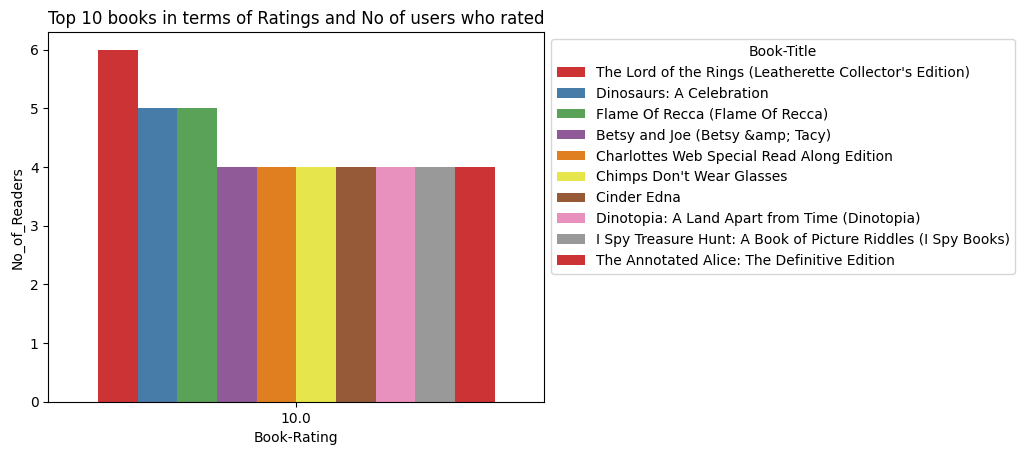

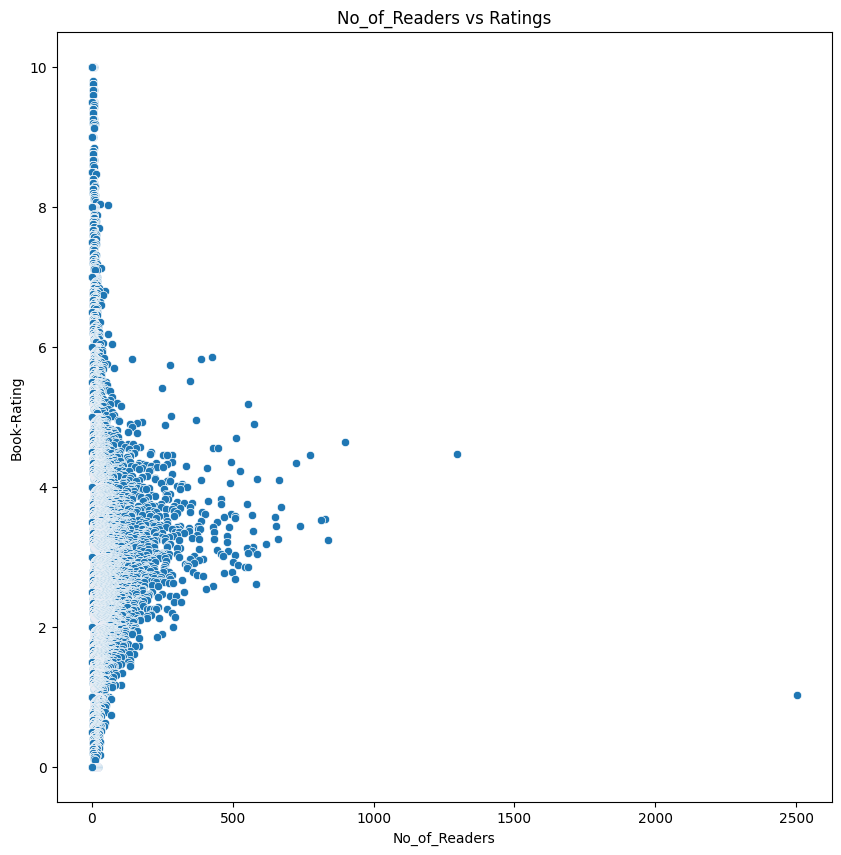

In [64]:
#Top 10 books according to the ratings and No of users who rated
books_users_ratings = pd.DataFrame(books_final.groupby(['Book-Title'], as_index=False).agg({'User-ID': 'size', 'Book-Rating': 'mean'}))
books_users_ratings.rename(columns = {'User-ID':'No_of_Readers'}, inplace = True)
books_users_ratings_top_10 = books_users_ratings.sort_values(['Book-Rating','No_of_Readers'], ascending=False)[0:10]
ax = sns.barplot(y = 'No_of_Readers', x='Book-Rating', data=books_users_ratings_top_10, palette = "Set1" , hue = 'Book-Title')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Top 10 books in terms of Ratings and No of users who rated')
plt.show()
plt.subplots(figsize=(10, 10))
sns.scatterplot(y = 'Book-Rating', x='No_of_Readers', data=books_users_ratings.sort_values(['Book-Rating','No_of_Readers'], ascending=False))
plt.title('No_of_Readers vs Ratings')
plt.show()

In [65]:
# Checking the highest users read book rating
books_users_ratings[books_users_ratings['No_of_Readers'] == 2502]

,Book-Title,No_of_Readers,Book-Rating
234951,Wild Animus,2502,1.019584


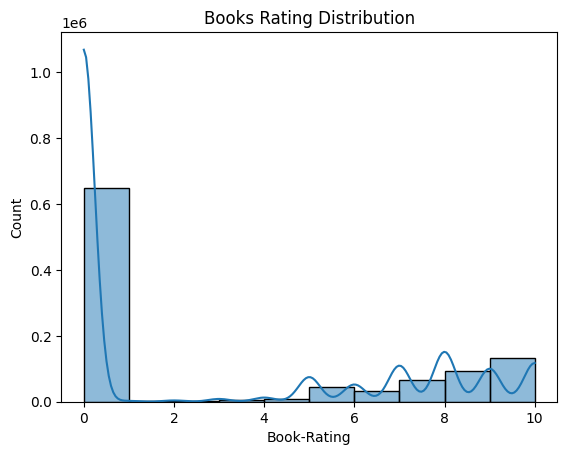

In [66]:
#histogram plot for books ratings
sns.histplot(books_final['Book-Rating'], bins=10, kde=True)
plt.title('Books Rating Distribution')
plt.show()

In [67]:
# Final df shape with and without 0 ratings
print("Without 0 ratings no of records are =",books_final[books_final['Book-Rating'] != 0].size)
print("With 0 ratings no of records are =",books_final.size)

Without 0 ratings no of records are = 4606104
With 0 ratings no of records are = 12373632


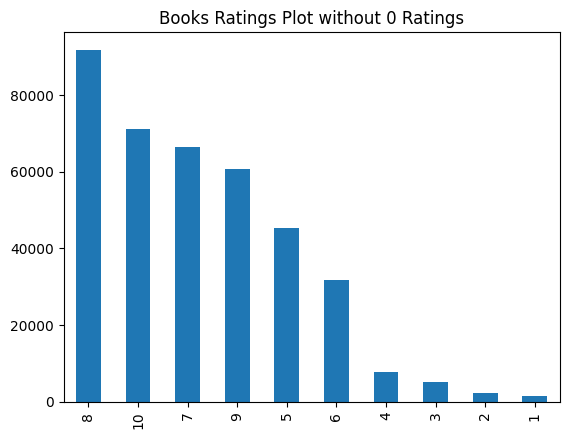

In [68]:
#Bar plot for ratings without 0
books_without_0_rating = books_final[books_final['Book-Rating'] != 0]
books_without_0_rating['Book-Rating'].value_counts(sort=True).plot(kind='bar')
plt.title('Books Ratings Plot without 0 Ratings')
plt.show()

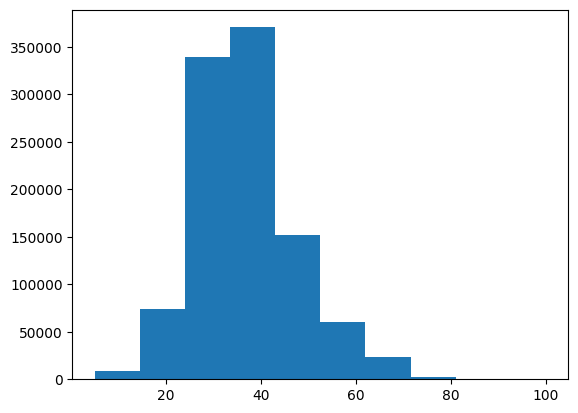

In [69]:
# Plotting histogram for age column
plt.hist(books_final['Age'])
plt.show()

Text(0.5, 1.0, 'Finding outliers in Age column')

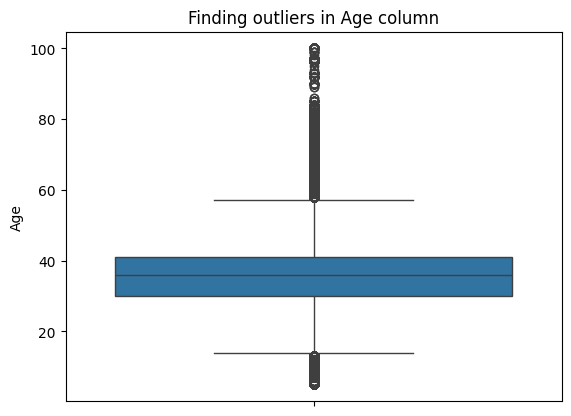

In [70]:
# finding outlier in age
sns.boxplot(y='Age', data=books_final)
plt.title('Finding outliers in Age column')

**Conclusion to EDA** - It's clear that books with highest ratings has less no of users who read and rated the book and viceversa. Takings the ratings column only for recommendation will not yield good result. Need to calculate weighted ratings with the help of ratings and num_ratings/No_of_users columns.

# **Model Building**

In [85]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357293 sha256=1a22aa3817c27ee1277c9cbe8838ecc855cec1f1c1cf52fad37f3e23956a077b
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [86]:
#Importing all the required packages


from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.dataset import DatasetAutoFolds
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
import numpy as np
import pickle
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Reading the final eda dataset and seeing the result for first five rows
merge_df=pd.read_csv("books_final_df.csv")
merge_df.head()

,User-ID,Age,Country,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,18.0,United States,0195153448,0.0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,33.0,Canada,0002005018,5.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,49.0,Canada,0002005018,0.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,32.0,Others,0002005018,8.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,33.0,Canada,0002005018,0.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


### Popularity Based Filtering

#### Top books

 **Popularity based recommendation system works with the trend. It usually depends upon the ratings and Number of users rated.**

Book weighted avg formula:

Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]

where,
    
    v is the number of votes for the books;

    m is the minimum votes required to be listed in the chart;

    R is the average rating of the book; and
    
    C is the mean vote across the whole report.

In [88]:
#Creating a copy of final eda dataset
books_all_records = merge_df.copy()

In [89]:
# Create column Rating average
books_all_records['Avg_Rating']=books_all_records.groupby('ISBN')['Book-Rating'].transform("mean")
# Create column No of users rated
books_all_records['No_Of_Users_Rated']=books_all_records.groupby('ISBN')['Book-Rating'].transform('count')
books_all_records.head()

,User-ID,Age,Country,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Avg_Rating,No_Of_Users_Rated
0,2,18.0,United States,0195153448,0.0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0,1.0
1,8,33.0,Canada,0002005018,5.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,25.0
2,11400,49.0,Canada,0002005018,0.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,25.0
3,11676,32.0,Others,0002005018,8.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,25.0
4,41385,33.0,Canada,0002005018,0.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,25.0


In [90]:
# checking for the null values
books_all_records.isnull().sum()

,0
User-ID,0
Age,1
Country,1
ISBN,1
Book-Rating,1
Book-Title,1
Book-Author,1
Year-Of-Publication,1
Publisher,1
Image-URL-S,1


In [91]:
# calculating C - mean vote across the whole report and m - minimum votes required to be listed in the top chart
C= books_all_records['Avg_Rating'].mean()
m= books_all_records['No_Of_Users_Rated'].quantile(0.90)

# Books who had ratings more than 90 percentile
popular_top_books = books_all_records.loc[books_all_records['No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
popular_top_books.shape

C=2.8227625560122993 , m=263.0


(199656, 14)

In [92]:
# function for weighted average
def weighted_rating(x,C=C,m=m):
  v=x['No_Of_Users_Rated']
  R=x['Avg_Rating']
  return (v/(v+m) * R) + (m/(m+v) * C)

In [93]:
# Apply weighted_rating function on popular_top_books dataset
popular_top_books["Score"]=popular_top_books.apply(weighted_rating,axis=1)

# Sorting Dataset on the basis of Score and dropping duplicate
popular_top_books.sort_values("Score",ascending=False,inplace=True)
popular_top_books.drop_duplicates('ISBN',inplace=True)


In [94]:
# Getting Top 50 Books to recommend every new user.
popular_top_books = popular_top_books[['Book-Title', 'Book-Author', 'No_Of_Users_Rated', 'Avg_Rating', 'Score', 'Image-URL-L']].reset_index(drop=True).head(50)
popular_top_books

,Book-Title,Book-Author,No_Of_Users_Rated,Avg_Rating,Score,Image-URL-L
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,374.0,6.537433,5.003747,http://images.amazon.com/images/P/0439139597.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,381.0,6.475066,4.983519,http://images.amazon.com/images/P/0439136350.0...
2,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,328.0,6.655488,4.949893,http://images.amazon.com/images/P/0439064864.0...
3,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,651.0,5.572965,4.781605,http://images.amazon.com/images/P/043935806X.0...
4,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,326.0,6.312883,4.754476,http://images.amazon.com/images/P/0590353403.0...
5,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1103.0,4.937443,4.530298,http://images.amazon.com/images/P/059035342X.0...
6,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,432.0,5.405093,4.427894,http://images.amazon.com/images/P/0439136369.0...
7,The Da Vinci Code,Dan Brown,1705.0,4.629326,4.387900,http://images.amazon.com/images/P/0385504209.0...
8,To Kill a Mockingbird,Harper Lee,751.0,4.885486,4.350480,http://images.amazon.com/images/P/0446310786.0...
9,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,552.0,5.028986,4.317039,http://images.amazon.com/images/P/0345339681.0...


#### Top books - CategoryWise

In [95]:
# Books who had ratings more than 90 percentile
popular_category_wise = books_all_records.loc[books_all_records['No_Of_Users_Rated'] >= m]
popular_category_wise.shape

(199656, 14)

In [96]:
# Apply weighted_rating function on popular_top_books dataset
popular_category_wise["Score"]=popular_category_wise.apply(weighted_rating,axis=1)
popular_category_wise = popular_category_wise[['Country','Publisher','Book-Author','Book-Title', 'No_Of_Users_Rated', 'Avg_Rating', 'Score', 'Image-URL-L']].reset_index(drop=True)
popular_category_wise.head()

,Country,Publisher,Book-Author,Book-Title,No_Of_Users_Rated,Avg_Rating,Score,Image-URL-L
0,United States,Dell,John Grisham,The Testament,820.0,3.086585,3.022518,http://images.amazon.com/images/P/0440234743.0...
1,United States,Dell,John Grisham,The Testament,820.0,3.086585,3.022518,http://images.amazon.com/images/P/0440234743.0...
2,United States,Dell,John Grisham,The Testament,820.0,3.086585,3.022518,http://images.amazon.com/images/P/0440234743.0...
3,United States,Dell,John Grisham,The Testament,820.0,3.086585,3.022518,http://images.amazon.com/images/P/0440234743.0...
4,United States,Dell,John Grisham,The Testament,820.0,3.086585,3.022518,http://images.amazon.com/images/P/0440234743.0...


In [ ]:
# Dropping duplicates if any
popular_category_wise.drop_duplicates(inplace=True)

In [ ]:
# Using pickle saving the popular_df
pickle.dump(popular_top_books,open('popular_top_books.pkl','wb'))
pickle.dump(popular_category_wise,open('popular_category_wise.pkl','wb'))

### Collaborative Based Filtering

In [ ]:
# Creating a list of users with more than 4 interactions
users_count_df = pd.DataFrame(merge_df.groupby(['User-ID'], as_index=False).agg(No_of_users=('User-ID', 'count')))
users_list = users_count_df[users_count_df['No_of_users'] > 4]['User-ID'].unique().tolist()

In [ ]:
# Taking the user-id, isbn and raings columns required for collaborative filtering
users_isbn_ratings_df = merge_df[['User-ID', 'ISBN', 'Book-Rating']]
users_isbn_ratings_df.rename(columns = {'Book-Rating':'ratings','User-ID' : 'userid', 'ISBN' : 'isbn'}, inplace = True)
users_isbn_ratings_df.head(15)

,userid,isbn,ratings
0,2,0195153448,0
1,8,0002005018,5
2,8,0060973129,0
3,8,0374157065,0
4,8,0393045218,0
5,8,0399135782,0
6,8,0425176428,0
7,8,0671870432,0
8,8,0679425608,0
9,8,074322678X,5


In [ ]:
# Only keeping the data with more than 4 interactions in users_isbn_ratings_df
users_isbn_ratings_df = users_isbn_ratings_df[users_isbn_ratings_df.userid.isin(users_list)]

In [ ]:
# Create a surprise dataset
reader = Reader(rating_scale=(1, 10))
svd_df = Dataset.load_from_df(users_isbn_ratings_df, reader)

In [ ]:
# creating training and testing sets needed for SVds
train_set = svd_df.build_full_trainset()
test_set = users_isbn_ratings_df.values.tolist()

In [ ]:
# Train the SVD model
final_model = SVD()
final_model.fit(train_set)

# Make predictions on the entire set
final_prediction = final_model.test(test_set)

In [ ]:
#rmse value for svd
accuracy.rmse(final_prediction)

RMSE: 1.0990


1.0989697087229358

In [ ]:
#Creating the pandas dataframe with actual and prediction of the ratings
updated_users_isbn_ratings_df = pd.DataFrame(final_prediction)
updated_users_isbn_ratings_df = updated_users_isbn_ratings_df.rename(columns={'uid':'userid', 'iid': 'isbn',
                            'r_ui':'actual_rating', 'est':'prediction_rating'})
updated_users_isbn_ratings_df.drop(columns='details', inplace=True)
updated_users_isbn_ratings_df

,userid,isbn,actual_rating,prediction_rating
0,8,0002005018,5,3.730198
1,8,0060973129,0,1.972649
2,8,0374157065,0,1.402880
3,8,0393045218,0,1.338923
4,8,0399135782,0,2.120409
...,...,...,...,...
925549,278854,0425163393,7,5.118567
925550,278854,0515087122,0,1.000000
925551,278854,0553275739,6,4.692608
925552,278854,0553578596,0,2.130092


In [ ]:
# Creating a pivot table for prediction_rating = 10
users_isbn_rating10 = updated_users_isbn_ratings_df[updated_users_isbn_ratings_df['prediction_rating'] == 10].pivot_table(index='userid',columns='isbn',values='prediction_rating').fillna(0)
users_isbn_rating10

isbn,0002251760,0003300277,0006547834,0007110928,0020306652,0020418809,0020442203,0020442300,0020442505,0020446500,...,8401462231,8408043641,8423310353,843760494X,8445071416,8478884459,8478884955,8478885196,8478886451,9505156944
userid,,,,,,,,,,,,,,,,,,,,,
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Item - Item based collaborative filtering**

In [ ]:
books_isbn = merge_df[['Book-Title', 'ISBN']]
books_isbn.drop_duplicates(inplace=True)

In [ ]:
# Calculate items similarities using Pearson correlation
item_similarities = users_isbn_rating10.corr(method='pearson')
item_similarities

isbn,0002251760,0003300277,0006547834,0007110928,0020306652,0020418809,0020442203,0020442300,0020442505,0020446500,...,8401462231,8408043641,8423310353,843760494X,8445071416,8478884459,8478884955,8478885196,8478886451,9505156944
isbn,,,,,,,,,,,,,,,,,,,,,
0002251760,1.000000,-0.000606,-0.000606,-0.000606,-0.000606,-0.000606,-0.000857,-0.000606,-0.000606,-0.000606,...,-0.000606,-0.000606,-0.000606,-0.000606,-0.001050,-0.000857,-0.000606,-0.000857,-0.000857,-0.000606
0003300277,-0.000606,1.000000,-0.000428,-0.000428,-0.000428,-0.000428,-0.000606,-0.000428,-0.000428,-0.000428,...,-0.000428,-0.000428,-0.000428,-0.000428,-0.000742,-0.000606,-0.000428,-0.000606,-0.000606,-0.000428
0006547834,-0.000606,-0.000428,1.000000,-0.000428,-0.000428,-0.000428,-0.000606,-0.000428,-0.000428,-0.000428,...,-0.000428,-0.000428,-0.000428,-0.000428,-0.000742,-0.000606,-0.000428,-0.000606,-0.000606,-0.000428
0007110928,-0.000606,-0.000428,-0.000428,1.000000,-0.000428,-0.000428,-0.000606,-0.000428,-0.000428,-0.000428,...,-0.000428,-0.000428,-0.000428,-0.000428,-0.000742,-0.000606,-0.000428,-0.000606,-0.000606,-0.000428
0020306652,-0.000606,-0.000428,-0.000428,-0.000428,1.000000,-0.000428,-0.000606,-0.000428,-0.000428,-0.000428,...,-0.000428,-0.000428,-0.000428,-0.000428,-0.000742,-0.000606,-0.000428,-0.000606,-0.000606,-0.000428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478884459,-0.000857,-0.000606,-0.000606,-0.000606,-0.000606,-0.000606,-0.000857,-0.000606,-0.000606,-0.000606,...,-0.000606,-0.000606,-0.000606,-0.000606,0.407636,1.000000,0.706955,-0.000857,0.499572,-0.000606
8478884955,-0.000606,-0.000428,-0.000428,-0.000428,-0.000428,-0.000428,-0.000606,-0.000428,-0.000428,-0.000428,...,-0.000428,-0.000428,-0.000428,-0.000428,0.577103,0.706955,1.000000,-0.000606,0.706955,-0.000428
8478885196,-0.000857,-0.000606,-0.000606,-0.000606,-0.000606,-0.000606,-0.000857,-0.000606,-0.000606,-0.000606,...,-0.000606,-0.000606,-0.000606,-0.000606,-0.001050,-0.000857,-0.000606,1.000000,0.499572,-0.000606


In [ ]:
# Define a function to find similar items from a given item
def similar_items(isbn):
    similar_isbn = item_similarities[isbn].dropna().sort_values(ascending=False)
    similar_isbn = similar_isbn.drop(index=isbn)
    similar_isbn = similar_isbn [similar_isbn > 0.6]
    return similar_isbn.index.tolist()

In [ ]:
# Using a similar_items function to find similar isbn's from given isbn
isbn_to_search = '0020442505'
similarISBN = similar_items(isbn_to_search)
print(f"Similar items as given item {isbn_to_search}: {similarISBN}")

Similar items as given item 0020442505: ['0671047515', '0765342510', '0064404994', '3522128001']


In [ ]:
# Finding the book titles for above similar isbn
print("The book-title for search isbn is - ", books_isbn[books_isbn['ISBN'] == isbn_to_search]['Book-Title'].values[0])
for each in similarISBN:
    print("The similar/recommended books are - ", books_isbn[books_isbn['ISBN'] == each]['Book-Title'].values[0])

The book-title for search isbn is -  The Silver Chair
The similar/recommended books are -  Hell's Kitchen
The similar/recommended books are -  The Santaroga Barrier
The similar/recommended books are -  The Lion, the Witch and the Wardrobe (rpkg) (Narnia)
The similar/recommended books are -  Die unendliche Geschichte: Von A bis Z


In [ ]:
# 2nd
isbn_to_search = '9505156944'
similarISBN = similar_items(isbn_to_search)
print(f"Similar items as given item {isbn_to_search}: {similarISBN}")

Similar items as given item 9505156944: ['0809239965', '0809232669']


In [ ]:
# Finding the book titles for above similar isbn
print("The book-title for search isbn is - ", books_isbn[books_isbn['ISBN'] == isbn_to_search]['Book-Title'].values[0])
for each in similarISBN:
    print("The similar/recommended books are - ", books_isbn[books_isbn['ISBN'] == each]['Book-Title'].values[0])

The book-title for search isbn is -  Toda Mafalda
The similar/recommended books are -  Baby Blues: This is Going to be Tougher Than We Thought
The similar/recommended books are -  She Started It!


In [ ]:
# 3rd
isbn_to_search = '0002251760'
similarISBN = similar_items(isbn_to_search)
print(f"Similar items as given item {isbn_to_search}: {similarISBN}")

Similar items as given item 0002251760: ['0811831620', '1558532161', '0553212478', '0679750169']


In [ ]:
# Finding the book titles for above similar isbn
print("The book-title for search isbn is - ", books_isbn[books_isbn['ISBN'] == isbn_to_search]['Book-Title'].values[0])
for each in similarISBN:
    print("The similar/recommended books are - ", books_isbn[books_isbn['ISBN'] == each]['Book-Title'].values[0])

The book-title for search isbn is -  The Forgetting Room: A Fiction (Byzantium Book)
The similar/recommended books are -  The Gryphon: In Which the Extraordinary Correspondence of Griffin &amp; Sabine Is Rediscovered
The similar/recommended books are -  Life's Little Instruction Book; Volume II
The similar/recommended books are -  Frankenstein (Changing Our World)
The similar/recommended books are -  The Romance of Tristan and Iseult (Vintage Classics)


#### **User - User based collaborative filtering**

In [ ]:
# Creating user to user similarity matrix using cosine similarity
user_similarities = 1-pairwise_distances(users_isbn_rating10.values,metric='cosine')
user_similarities

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Filling the diagonal values with 0 as those are paired with itself
np.fill_diagonal(user_similarities, 0)
user_similarities

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Store the user_similarities in a dataframe
user_similarities = pd.DataFrame(user_similarities, index=users_isbn_rating10.index.to_list(), columns=users_isbn_rating10.index.to_list())
user_similarities

,114,507,638,709,882,929,1025,1075,1248,1435,...,277051,277195,277427,277523,277527,277965,278221,278356,278582,278633
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Checking the correlation between columns
user_similarities.describe()

,114,507,638,709,882,929,1025,1075,1248,1435,...,277051,277195,277427,277523,277527,277965,278221,278356,278582,278633
count,2336.000000,2336.0,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,...,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.0,2336.000000,2336.000000,2336.000000
mean,0.003110,0.0,0.005105,0.003063,0.009625,0.002460,0.000838,0.005906,0.000588,0.000931,...,0.000856,0.001284,0.000428,0.001319,0.000327,0.004017,0.0,0.010043,0.003030,0.001554
std,0.048119,0.0,0.040899,0.053479,0.068622,0.046721,0.025855,0.067283,0.015023,0.020550,...,0.025331,0.035821,0.020690,0.018308,0.011330,0.046769,0.0,0.070888,0.043877,0.024373
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,0.0,0.534522,1.000000,0.577350,1.000000,1.000000,1.000000,0.500000,0.500000,...,1.000000,1.000000,1.000000,0.353553,0.447214,0.707107,0.0,1.000000,0.707107,0.500000


In [ ]:
books_users = merge_df[['Book-Title', 'User-ID']]
books_users.drop_duplicates(inplace=True)

In [ ]:
# Define a function to find similar items from a given item
def similar_users(userId):
    similar_users = user_similarities[user_similarities[userId]>0.6].index
    return similar_users

In [ ]:
# Using a similar_users function to find similar users from given userID
user_to_search = 114
similarUsers = similar_users(user_to_search)
print(f"Similar users as given user {user_to_search}: {similarUsers}")

Similar users as given user 114: Index([86969, 128332, 148030, 204622, 206305], dtype='int64')


In [ ]:
# Finding the book titles for above similar users
print("The book-title read by users is - ", books_users[books_users['User-ID'] == user_to_search]['Book-Title'].values)
print("\n")
for each in similarUsers:
    print("The similar user ",each," are reading - \n", books_users[books_users['User-ID'] == each]['Book-Title'].values)
    print("\n")

The book-title read by users is -  ['Blood Oath' 'The Alibi' 'The Beach House' 'A Kiss Remembered'
 'The Short Forever' 'Dead Aim' 'Angels &amp; Demons' 'The Deal']


The similar user  86969  are reading - 
 ['Second Sight' 'The Wailing Wind' 'Life of Pi' 'Four Blind Mice'
 'Monster : A Novel (Alex Delaware Novels (Paperback))'
 'Dr. Death (Alex Delaware Novels (Paperback))' 'Taking the Fifth'
 'Gone, but Not Forgotten' 'Point of Origin'
 'Pariah: A Kurt Muller Mystery (Kurt Muller Mysteries (Paperback))'
 'The Partner' 'The Testament' 'Hide &amp; Seek' 'The Laws of Our Fathers'
 'Personal Injuries' 'Violets Are Blue' '2nd Chance'
 'A Darkness More Than Night'
 'Favorite Father Brown Stories (Dover Thrift Editions)'
 'Lines and Shadows' 'The Next Accident' 'Touching Evil'
 'The Survivors Club' 'The Last Dream-o-Rama'
 'Silent Night : A Christmas Suspense Story' 'Angels &amp; Demons'
 'Remember Me' 'TYCOON' "I'll Be Seeing You"
 "Jarhead : A Marine's Chronicle of the Gulf War and Other 

In [ ]:
# Recommended testing for particular user
search_users_books_list = books_users[books_users['User-ID'] == 114]['Book-Title'].values.tolist()
rec_users_books_list = books_users[books_users['User-ID'] == 86969]['Book-Title'].values.tolist()

result = [a for a in rec_users_books_list if a not in search_users_books_list]

print("The recommended book for user - ", 114, "are :")
result

The recommended book for user -  114 are :


['Second Sight',
 'The Wailing Wind',
 'Life of Pi',
 'Four Blind Mice',
 'Monster : A Novel (Alex Delaware Novels (Paperback))',
 'Dr. Death (Alex Delaware Novels (Paperback))',
 'Taking the Fifth',
 'Gone, but Not Forgotten',
 'Point of Origin',
 'Pariah: A Kurt Muller Mystery (Kurt Muller Mysteries (Paperback))',
 'The Partner',
 'The Testament',
 'Hide &amp; Seek',
 'The Laws of Our Fathers',
 'Personal Injuries',
 'Violets Are Blue',
 '2nd Chance',
 'A Darkness More Than Night',
 'Favorite Father Brown Stories (Dover Thrift Editions)',
 'Lines and Shadows',
 'The Next Accident',
 'Touching Evil',
 'The Survivors Club',
 'The Last Dream-o-Rama',
 'Silent Night : A Christmas Suspense Story',
 'Remember Me',
 'TYCOON',
 "I'll Be Seeing You",
 "Jarhead : A Marine's Chronicle of the Gulf War and Other Battles",
 'The Lions of Lucerne',
 "Dereliction of Duty: The Eyewitness Account of How Bill Clinton Endangered America's Long-Term National Security"]

In [ ]:
# Using a similar_users function to find similar users from given userID
user_to_search = 507
similarUsers = similar_users(user_to_search)
print(f"Similar users as given user {user_to_search}: {similarUsers}")

Similar users as given user 507: Index([], dtype='int64')


In [ ]:
# Finding the book titles for above similar isbn
print("The book-title read by users is - ", books_users[books_users['User-ID'] == user_to_search]['Book-Title'].values)
print("\n")
for each in similarUsers:
    print("The similar user ",each," are reading - \n", books_users[books_users['User-ID'] == each]['Book-Title'].values)
    print("\n")

The book-title read by users is -  ['Over Sea, Under Stone'
 'Stupid White Men ...and Other Sorry Excuses for the State of the Nation!'
 'Ella Enchanted (rack)' 'Two Princesses of Bamarre, The'
 'Bel Canto: A Novel'
 'Fast Food Nation: The Dark Side of the All-American Meal' 'Flashpoint'
 'Eyeshot' 'Little House on the Prairie' 'The Te of Piglet'
 'Girl in Hyacinth Blue' 'The Secret Life of Bees'
 'Growing Vegetable Soup (Voyager/Hbj Book)' '101 Dalmatians'
 'When I Grow Up (Little Look-Look)' 'The Volcano Machine (Dino-Riders)'
 'My First Book about Space (Golden Look-Look Books (Paperback))'
 'The New Baby' "Disney's Pocahontas (Golden Look Look Books)"
 'Comic Characters'
 'Out of the Deep I Cry : A Clare Fergusson/Russ Van Alstyne Mystery'
 'In the Bleak Midwinter (A Rev. Clare Ferguson Mystery)'
 'One for the Money (A Stephanie Plum Novel)'
 'A Fountain Filled With Blood (A Rev. Clare Ferguson Mystery)'
 '1st to Die: A Novel' 'Rainbow the Stormy Life of Judy Garland'
 "The Princes

In [ ]:
# Using a similar_users function to find similar users from given userID
user_to_search = 709
similarUsers = similar_users(user_to_search)
print(f"Similar users as given user {user_to_search}: {similarUsers}")

Similar users as given user 709: Index([21484, 22936, 25850, 30210, 77072, 259006, 273420], dtype='int64')


In [ ]:
# Finding the book titles for above similar isbn
print("The book-title read by users is - ", books_users[books_users['User-ID'] == user_to_search]['Book-Title'].values)
print("\n")
for each in similarUsers:
    print("The similar user ",each," are reading - \n", books_users[books_users['User-ID'] == each]['Book-Title'].values)
    print("\n")

The book-title read by users is -  ['City of the Beasts' "The Magician's Nephew (Narnia)"
 'The Silver Chair (full color) (Narnia)'
 'High Wizardry: The Third Book in the Young Wizards Series'
 'So You Want to Be a Wizard: The First Book in the Young Wizards Series'
 'Deep Wizardry: The Second Book in the Young Wizards Series'
 'The Lovely Bones: A Novel' "The Hitchhiker's Guide to the Galaxy"
 'The Hork-Bajir Chronicles (Animorphs Series)'
 'Circles in the Stream (Avalon: Web of Magic, 1)'
 'All That Glitters (Avalon, 2)' 'Cry of the Wolf (Avalon, 3)'
 'Avalon: Web Of Magic #5: Spellsinger'
 'The Secret of the Unicorn (Avalon Web of Magic, 4)' 'Trial by Fire'
 'The Giver (21st Century Reference)'
 'Ties That Bind, Ties That Break (Laurel-Leaf Books)'
 'The Music of Dolphins (Apple Signature Edition)'
 "Caddie Woodlawn - Newbery Promo '99 (Aladdin Fiction)"
 'Sunwing (Aladdin Fantasy)' "The Janitor's Boy"
 'The Hauntings of Williamsburg, Yorktown, and Jamestown'
 'Going for Great (Ag F

In [ ]:
# Recommended testing for particular user
search_users_books_list = books_users[books_users['User-ID'] == 709]['Book-Title'].values.tolist()
rec_users_books_list = books_users[books_users['User-ID'] == 21484]['Book-Title'].values.tolist()

result = [a for a in rec_users_books_list if a not in search_users_books_list]

print("The recommended book for user - ", 709, "are :")
result

The recommended book for user -  709 are :


['Politically Correct Bedtime Stories: Modern Tales for Our Life and Times',
 'The Lady, the Chef, and the Courtesan',
 'The Andromeda Strain',
 'The Poisonwood Bible: A Novel',
 'Wicked: The Life and Times of the Wicked Witch of the West',
 'Fried Green Tomatoes at the Whistle Stop Cafe',
 'The Neverending Story',
 "The Deep End of the Ocean (Oprah's Book Club)",
 'Wuthering Heights (Penguin Classics)',
 "Bridget Jones's Diary",
 'The Adventures of Tom Sawyer',
 'Crossing: A Memoir',
 'The Queen of the Tambourine',
 'Fahrenheit 451',
 "The Princess Bride: S Morgenstern's Classic Tale of True Love and High Adventure",
 'How to Make an American Quilt',
 'The Fairy Godmother',
 'Founding Brothers: The Revolutionary Generation',
 'Straight Man : A Novel (Vintage Contemporaries)',
 'The Elegant Universe: Superstrings, Hidden Dimensions, and the Quest for the Ultimate Theory',
 'Watership Down',
 'Diary of a Mad Bride (Summer Display Opportunity)',
 '\\Surely You\'re Joking, Mr. Feynman!\\"

In [ ]:
# Chunking the updated_users_isbn_ratings_df dataframe

#specify number of rows in each chunk
n=6000

#split DataFrame into chunks
users_isbn_ratings_df_list = [updated_users_isbn_ratings_df[i:i+n] for i in range(0,len(updated_users_isbn_ratings_df),n)]

In [ ]:
# Create a pivot table for each dataframe in users_isbn_ratings_df_list
users_isbn_ratings_pivot_list = []
for each in users_isbn_ratings_df_list:
    users_isbn_ratings_pivot_list.append(each.pivot_table(index='userid',columns='isbn',values='prediction_rating').fillna(0))

In [ ]:
# Create a cosine similarity matrix for each pivot table in users_isbn_ratings_pivot_list
cos_sim_users_list_df = []
for each in users_isbn_ratings_pivot_list:
    cos_sim = 1-pairwise_distances(each.values,metric='cosine')
    np.fill_diagonal(cos_sim, 0)
    cos_sim_users_list_df.append(pd.DataFrame(cos_sim, index=each.index.to_list(), columns=each.index.to_list()))

In [ ]:
# Looping through each and every userId and cosine similarity matrix for finding the recommendation users and adding to the list
user_search_plus_rec_list = []

for cos_sim in cos_sim_users_list_df:
    for user in cos_sim.index.tolist():
        no_of_rec_users = cos_sim[cos_sim[user] > 0.6].index.tolist()
        if len(no_of_rec_users) != 0:
            for every in no_of_rec_users:
                user_search_plus_rec_list.append([user, every])

In [ ]:
# Creating a dataframe for search user and its corresponding recommendation
user_search_plus_rec_df = pd.DataFrame(user_search_plus_rec_list, columns=['search_user', 'rec_user'])
user_search_plus_rec_df

,search_user,rec_user
0,47077,48519
1,48519,47077
2,77161,78682
3,78682,77161
4,88812,89074
...,...,...
107,176696,176170
108,196773,198303
109,198303,196773
110,240704,241344


In [ ]:
#Creating a list of no of books read by recommended users
num_of_books_read = []
i=0
for i in range(len(user_search_plus_rec_df)):
    read_books = books_users[books_users['User-ID'] == user_search_plus_rec_df.loc[i,'rec_user']]['Book-Title'].values
    num_of_books_read.append(read_books.size)

In [ ]:
# Creating a new column num_of_books_read in user_search_plus_rec_df
user_search_plus_rec_df['num_of_books_read']= num_of_books_read
user_search_plus_rec_df

,search_user,rec_user,num_of_books_read
0,47077,48519,6
1,48519,47077,7
2,77161,78682,7
3,78682,77161,5
4,88812,89074,5
...,...,...,...
107,176696,176170,6
108,196773,198303,6
109,198303,196773,6
110,240704,241344,7


In [ ]:
# Creating a list of no of similar books between search user and recommended users
num_of_similar_books = []
i=0
for i in range(len(user_search_plus_rec_df)):
    search_users_books_list = books_users[books_users['User-ID'] == user_search_plus_rec_df.loc[i,'search_user']]['Book-Title'].values.tolist()
    rec_users_books_list = books_users[books_users['User-ID'] == user_search_plus_rec_df.loc[i,'rec_user']]['Book-Title'].values.tolist()

    result = [a for a in search_users_books_list if a in rec_users_books_list]

    num_of_similar_books.append(len(result))

In [ ]:
# Creating a new column num_of_similar_books in user_search_plus_rec_df
user_search_plus_rec_df['num_of_similar_books']= num_of_similar_books
user_search_plus_rec_df

,search_user,rec_user,num_of_books_read,num_of_similar_books
0,47077,48519,6,1
1,48519,47077,7,1
2,77161,78682,7,1
3,78682,77161,5,1
4,88812,89074,5,3
...,...,...,...,...
107,176696,176170,6,1
108,196773,198303,6,1
109,198303,196773,6,1
110,240704,241344,7,1


In [ ]:
#Finding the value counts on num_of_similar_books
user_search_plus_rec_df['num_of_similar_books'].value_counts()

num_of_similar_books
44    30
42    28
43    24
1     16
41     6
3      4
24     2
40     2
Name: count, dtype: int64

##### Combining all the knowledge to find recommended ISBN for similar search ISBN

In [ ]:
# Chunking the updated_users_isbn_ratings_df dataframe

#specify number of rows in each chunk
n=2000

#split DataFrame into chunks
users_isbn_ratings_df_list = [updated_users_isbn_ratings_df[i:i+n] for i in range(0,len(updated_users_isbn_ratings_df),n)]

In [ ]:
# Create a pivot table for each dataframe in users_isbn_ratings_df_list
users_isbn_ratings_pivot_list = []
for each in users_isbn_ratings_df_list:
    users_isbn_ratings_pivot_list.append(each.pivot_table(index='userid',columns='isbn',values='prediction_rating').fillna(0))

In [ ]:
# Create a correlation matrix for each pivot table in users_isbn_ratings_pivot_list
corr_items_list_df = []
for each in users_isbn_ratings_pivot_list:
    corr_items_list_df.append(each.corr(method='pearson'))

In [ ]:
#Creating a empty dataframe for search isbn and its corresponding recommendation
isbn_search_plus_rec_df = pd.DataFrame(columns=['search_isbn', 'rec_isbn'])

In [ ]:
# Looping through each and every isbn and correlation matrix for finding the recommendation isbn's and adding to the list

for each in corr_items_list_df[0:25]:
    isbn_search_plus_rec_list = []
    for isbn in each.columns.tolist():
        similar_isbn = each[isbn].dropna().sort_values(ascending=False)
        try : similar_isbn = similar_isbn.drop(index=isbn)
        except: continue
        similar_isbn = similar_isbn [similar_isbn > 0.6]
        if len(similar_isbn) > 10:
            isbn_list = ",".join(similar_isbn.index.tolist())
            isbn_search_plus_rec_list.append([isbn, isbn_list])
    df1 = pd.DataFrame(isbn_search_plus_rec_list, columns=['search_isbn', 'rec_isbn'])
    isbn_search_plus_rec_df = pd.concat([df1, isbn_search_plus_rec_df])

In [ ]:
# displaying isbn's recommendation for particular isbn
isbn_search_plus_rec_df

,search_isbn,rec_isbn
0,0004724119,"0440241073,0721456790,0684874385,0689829531,03..."
1,0020125305,"0440241073,0721456790,0684874385,0689829531,03..."
2,0020125607,"0440241073,0721456790,0684874385,0689829531,03..."
3,0020288905,"0440241073,0721456790,0684874385,0689829531,03..."
4,0026284707,"0132187027,0688074049,0451184165,0671680951,04..."
...,...,...
1571,8483002523,"8475960650,8472227421,8477830029,8486433193,84..."
1572,848300402X,"8429729119,8474102944,8401351421,8483002523,84..."
1573,8486433193,"8477830029,8483002523,8429725792,8474102944,84..."
1574,8486433770,"8429729119,8474102944,8401351421,8486433193,84..."


## Model Evaluation

In [ ]:
#Creating a copy of final eda dataset
books_df = merge_df.copy()

In [ ]:
# Create column No of users rated
books_df['No_Of_Users_Rated']=books_df.groupby('ISBN')['Book-Rating'].transform('count')
books_df.head()

,User-ID,Age,Country,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,No_Of_Users_Rated
0,2,18.0,United States,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1
1,8,33.0,Canada,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14
2,8,33.0,Canada,0060973129,0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3
3,8,33.0,Canada,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,11
4,8,33.0,Canada,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1


In [ ]:
# Selecting only the required columns needed
books_df.drop(columns=['Age', 'Year-Of-Publication', 'Country', 'Publisher', 'Image-URL-S', 'Image-URL-M'], inplace=True)
books_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Image-URL-L,No_Of_Users_Rated
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...,1
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,14
2,8,0060973129,0,Decision in Normandy,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...,3
3,8,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...,11
4,8,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,http://images.amazon.com/images/P/0393045218.0...,1


In [ ]:
# keeping only the records with more than 4 interactions
books_df = books_df[books_df['No_Of_Users_Rated'] > 4]
books_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Image-URL-L,No_Of_Users_Rated
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,14
3,8,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...,11
5,8,0399135782,0,The Kitchen God's Wife,Amy Tan,http://images.amazon.com/images/P/0399135782.0...,33
6,8,0425176428,0,What If?: The World's Foremost Military Histor...,Robert Cowley,http://images.amazon.com/images/P/0425176428.0...,5
10,8,0771074670,0,Nights Below Station Street,David Adams Richards,http://images.amazon.com/images/P/0771074670.0...,6


In [ ]:
# Taking the user-id, isbn and raings columns required for collaborative filtering
users_isbn_ratings_df = books_df[['User-ID', 'ISBN', 'Book-Rating']]
users_isbn_ratings_df.rename(columns = {'Book-Rating':'ratings','User-ID' : 'userid', 'ISBN' : 'isbn'}, inplace = True)
users_isbn_ratings_df.head(15)

,userid,isbn,ratings
1,8,0002005018,5
3,8,0374157065,0
5,8,0399135782,0
6,8,0425176428,0
10,8,0771074670,0
14,8,1558746218,0
18,9,0440234743,0
19,9,0452264464,6
20,9,0609804618,0
21,10,1841721522,0


In [ ]:
# Create a surprise dataset
reader = Reader(rating_scale=(1, 10))
svd_df = Dataset.load_from_df(users_isbn_ratings_df, reader)

In [ ]:
# Split the dataset into training and test sets
trainset, testset = train_test_split(svd_df, test_size=0.2, random_state=42)

In [ ]:
# Train the svd model
model = SVD()
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

In [ ]:
#rmse value for svd
accuracy.rmse(predictions)

RMSE: 3.5939


3.593867219207912

In [ ]:
# Create a top-N ranking of recommendations for each user in the test set
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Sort the predictions for each user and retrieve the top N
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

top_n = get_top_n(predictions, n=10)

In [ ]:
# Displaying the topN recommendation ranking
top_n

defaultdict(list,
            {271247: [('0440241537', 3.2703407983205404)],
             215225: [('3426619644', 3.581424569479011),
              ('3499137909', 3.421499939133156),
              ('3442413338', 3.3702514217776858),
              ('3442063809', 2.7106987446801947),
              ('3499156717', 2.4742551036219522),
              ('374661922X', 2.3348728667285097),
              ('3922028020', 2.269956652022523),
              ('3442124875', 1.9009062381588893),
              ('3548255329', 1.6712850621979334),
              ('3499223155', 1.394012839643918)],
             77809: [('0786868716', 7.490880820675396),
              ('0679429220', 6.380811852223622),
              ('0312252617', 5.5290136870773985),
              ('0425192725', 5.456815882629813),
              ('0590396056', 4.742527557189718),
              ('0375706771', 4.459950755300741),
              ('0061057894', 4.321593124081648),
              ('0842342702', 4.211858669242768),
              ('08

In [ ]:
# Evaluate the model using precision and recall
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=4)

# Precision and recall can then be averaged over all users
print(f"Precision: {sum(prec for prec in precisions.values()) / len(precisions)}")
print(f"Recall: {sum(rec for rec in recalls.values()) / len(recalls)}")

Precision: 0.8435788065424303
Recall: 0.5466945741230151


In [ ]:
# Hyperparameter Tuning - Finding best parameter
param_grid = {
    "n_factors": [25, 40, 55],  # default 100
    "n_epochs": [10, 20],  # default 20
    "lr_all": [0.005, 0.025, 0.125],  # learning rate for all parameters. Default 0.005
    "reg_all": [0.08, 0.16, 0.32],  # regularization term for all parameters. Default 0.02
    "random_state": [0],
}

grid_search = GridSearchCV(
    SVD,
    param_grid,
    measures=["rmse", "mae"],
    cv=3,  # 5,
    refit=True,
    n_jobs=-1,
    joblib_verbose=2
)

grid_search.fit(svd_df)

pd.DataFrame.from_dict(grid_search.cv_results)[[
    "mean_test_rmse", "mean_test_mae", "param_n_factors",
    "param_n_epochs", "param_lr_all", "param_reg_all"
]].sort_values("mean_test_rmse")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  8.5min finished


,mean_test_rmse,mean_test_mae,param_n_factors,param_n_epochs,param_lr_all,param_reg_all
1,3.487445,3.013703,25,10,0.005,0.16
19,3.488518,3.014291,40,10,0.005,0.16
37,3.489747,3.015081,55,10,0.005,0.16
11,3.493618,3.027409,25,20,0.005,0.32
29,3.494513,3.028706,40,20,0.005,0.32
0,3.494564,2.996321,25,10,0.005,0.08
47,3.495642,3.030202,55,20,0.005,0.32
18,3.496646,2.997658,40,10,0.005,0.08
2,3.497297,3.055861,25,10,0.005,0.32
20,3.497629,3.056372,40,10,0.005,0.32


In [ ]:
# keeping only the records with more than 0 ratings
books_df = books_df[books_df['Book-Rating'] > 0]
books_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Image-URL-L,No_Of_Users_Rated
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,14
19,9,0452264464,6,Beloved (Plume Contemporary Fiction),Toni Morrison,http://images.amazon.com/images/P/0452264464.0...,180
24,14,0439095026,5,Tell Me This Isn't Happening,Robynn Clairday,http://images.amazon.com/images/P/0439095026.0...,6
27,16,0345402871,9,Airframe,Michael Crichton,http://images.amazon.com/images/P/0345402871.0...,207
30,17,0425099148,7,Death in the Clouds,Agatha Christie,http://images.amazon.com/images/P/0425099148.0...,17


In [ ]:
# Taking the user-id, isbn and raings columns required for collaborative filtering
users_isbn_ratings_df1 = books_df[['User-ID', 'ISBN', 'Book-Rating']]
users_isbn_ratings_df1.rename(columns = {'Book-Rating':'ratings','User-ID' : 'userid', 'ISBN' : 'isbn'}, inplace = True)
users_isbn_ratings_df1.head(15)

,userid,isbn,ratings
1,8,0002005018,5
19,9,0452264464,6
24,14,0439095026,5
27,16,0345402871,9
30,17,0425099148,7
31,17,0553264990,5
34,17,0891075275,6
35,17,0891076182,3
36,19,0375759778,7
43,26,0446310786,10


In [ ]:
# Create a surprise dataset
reader = Reader(rating_scale=(1, 10))
svd_df1 = Dataset.load_from_df(users_isbn_ratings_df1, reader)

In [ ]:
# Split the dataset into training and test sets
trainset1, testset1 = train_test_split(svd_df1, test_size=0.2, random_state=42)

In [ ]:
# Train the svd model
model1 = SVD()
model1.fit(trainset1)

# Make predictions on the test set
predictions1 = model1.test(testset1)

#rmse value for svd
accuracy.rmse(predictions1)

RMSE: 1.6267


1.6266854740170633

<Axes: ylabel='Frequency'>

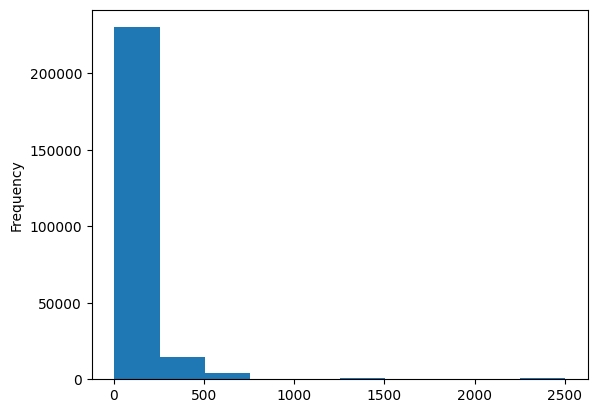

In [ ]:
#Histogram plot for No_Of_Users_Rated
books_df['No_Of_Users_Rated'].plot(kind='hist')

In [ ]:
# keeping only the records with more than 50 users ratings
books_df = books_df[books_df['No_Of_Users_Rated'] > 50]
books_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Image-URL-L,No_Of_Users_Rated
19,9,0452264464,6,Beloved (Plume Contemporary Fiction),Toni Morrison,http://images.amazon.com/images/P/0452264464.0...,180
27,16,0345402871,9,Airframe,Michael Crichton,http://images.amazon.com/images/P/0345402871.0...,207
43,26,0446310786,10,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,389
44,26,0449005615,9,Seabiscuit: An American Legend,LAURA HILLENBRAND,http://images.amazon.com/images/P/0449005615.0...,246
45,32,0060168013,8,Pigs in Heaven,Barbara Kingsolver,http://images.amazon.com/images/P/0060168013.0...,55


In [ ]:
# Taking the user-id, isbn and raings columns required for collaborative filtering
users_isbn_ratings_df2 = books_df[['User-ID', 'ISBN', 'Book-Rating']]
users_isbn_ratings_df2.rename(columns = {'Book-Rating':'ratings','User-ID' : 'userid', 'ISBN' : 'isbn'}, inplace = True)
users_isbn_ratings_df2.head(15)

,userid,isbn,ratings
19,9,0452264464,6
27,16,0345402871,9
43,26,0446310786,10
44,26,0449005615,9
45,32,0060168013,8
51,39,0671888587,7
52,42,0553582747,7
55,44,0440223571,8
58,51,0440225701,9
66,56,0671623249,7


In [ ]:
# Create a surprise dataset
reader = Reader(rating_scale=(1, 10))
svd_df2 = Dataset.load_from_df(users_isbn_ratings_df2, reader)

In [ ]:
# Split the dataset into training and test sets
trainset2, testset2 = train_test_split(svd_df2, test_size=0.2, random_state=42)

In [ ]:
# Train the svd model
model2 = SVD()
model2.fit(trainset2)

# Make predictions on the test set
predictions2 = model2.test(testset2)

#rmse value for svd
accuracy.rmse(predictions2)

RMSE: 1.6019


1.6019086958672148

In [ ]:
# Create a top-N ranking of recommendations for each user in the test set
top_n2 = get_top_n(predictions2, n=10)

In [ ]:
# Evaluate the model using precision and recall
precisions, recalls = precision_recall_at_k(predictions2, k=10, threshold=4)

# Precision and recall can then be averaged over all users
print(f"Precision: {sum(prec for prec in precisions.values()) / len(precisions)}")
print(f"Recall: {sum(rec for rec in recalls.values()) / len(recalls)}")

Precision: 0.9771403491277851
Recall: 0.9965215125987674


In [ ]:
# Hyperparameter Tuning - Finding best parameter
param_grid = {
    "n_factors": [25, 40, 55],  # default 100
    "n_epochs": [10, 20],  # default 20
    "lr_all": [0.005, 0.025, 0.125],  # learning rate for all parameters. Default 0.005
    "reg_all": [0.08, 0.16, 0.32],  # regularization term for all parameters. Default 0.02
    "random_state": [0],
}

grid_search = GridSearchCV(
    SVD,
    param_grid,
    measures=["rmse", "mae"],
    cv=3,  # 5,
    refit=True,
    n_jobs=-1,
    joblib_verbose=2
)

grid_search.fit(svd_df2)

pd.DataFrame.from_dict(grid_search.cv_results)[[
    "mean_test_rmse", "mean_test_mae", "param_n_factors",
    "param_n_epochs", "param_lr_all", "param_reg_all"
]].sort_values("mean_test_rmse")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   59.2s finished


,mean_test_rmse,mean_test_mae,param_n_factors,param_n_epochs,param_lr_all,param_reg_all
5,1.611728,1.249555,25,10,0.025,0.32
23,1.611852,1.249832,40,10,0.025,0.32
41,1.611868,1.249746,55,10,0.025,0.32
40,1.613115,1.246644,55,10,0.025,0.16
22,1.613323,1.246726,40,10,0.025,0.16
4,1.614169,1.246492,25,10,0.025,0.16
50,1.614864,1.247884,55,20,0.025,0.32
32,1.615019,1.247711,40,20,0.025,0.32
14,1.616507,1.248539,25,20,0.025,0.32
10,1.617856,1.256481,25,20,0.005,0.16


In [ ]:
#Final dataset after increasing the evaluation
books_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Image-URL-L,No_Of_Users_Rated
19,9,0452264464,6,Beloved (Plume Contemporary Fiction),Toni Morrison,http://images.amazon.com/images/P/0452264464.0...,180
27,16,0345402871,9,Airframe,Michael Crichton,http://images.amazon.com/images/P/0345402871.0...,207
43,26,0446310786,10,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,389
44,26,0449005615,9,Seabiscuit: An American Legend,LAURA HILLENBRAND,http://images.amazon.com/images/P/0449005615.0...,246
45,32,0060168013,8,Pigs in Heaven,Barbara Kingsolver,http://images.amazon.com/images/P/0060168013.0...,55


In [ ]:
#applying the svd model on entire dataset

#Final train and test set
train_set_final = svd_df2.build_full_trainset()
test_set_final = users_isbn_ratings_df2.values.tolist()

# Train the SVD model
final_model = SVD()
final_model.fit(train_set_final)

# Make predictions on the entire set
final_prediction = final_model.test(test_set_final)

In [ ]:
#Creating the pandas dataframe with actual and prediction of the ratings
updated_users_isbn_ratings_df = pd.DataFrame(final_prediction)
updated_users_isbn_ratings_df = updated_users_isbn_ratings_df.rename(columns={'uid':'userid', 'iid': 'isbn',
                            'r_ui':'actual_rating', 'est':'prediction_rating'})
updated_users_isbn_ratings_df.drop(columns='details', inplace=True)
updated_users_isbn_ratings_df

,userid,isbn,actual_rating,prediction_rating
0,9,0452264464,6,6.690591
1,16,0345402871,9,7.730275
2,26,0446310786,10,9.513623
3,26,0449005615,9,8.818893
4,32,0060168013,8,8.489467
...,...,...,...,...
92691,278846,0060809833,8,8.125051
92692,278851,1558531025,8,7.705456
92693,278854,0375703063,7,7.071485
92694,278854,042516098X,7,6.752696


In [ ]:
# Creating a pivot table
users_isbn_rating = updated_users_isbn_ratings_df.pivot_table(index='userid',columns='isbn',values='prediction_rating').fillna(0)
users_isbn_rating

isbn,000649840X,002026478X,0020442203,002542730X,0028604199,006000438X,0060008032,0060008776,006001203X,0060085444,...,1860492592,1878424319,1885171080,1931561648,3257228007,3257229534,3404148665,3423202327,3442541751,3492045170
userid,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### user-user collaborative filtering

In [ ]:
# Creating user to user similarity matrix using cosine similarity
user_similarities = 1-pairwise_distances(users_isbn_rating.values,metric='cosine')
user_similarities

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Filling the diagonal values with 0 as those are paired with itself
np.fill_diagonal(user_similarities, 0)
user_similarities

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Store the user_similarities in a dataframe
user_similarities = pd.DataFrame(user_similarities, index=users_isbn_rating.index.to_list(), columns=users_isbn_rating.index.to_list())
user_similarities

,9,16,26,32,39,42,44,51,56,75,...,278800,278807,278828,278832,278836,278843,278844,278846,278851,278854
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Checking the correlation between columns
user_similarities.describe()

,9,16,26,32,39,42,44,51,56,75,...,278800,278807,278828,278832,278836,278843,278844,278846,278851,278854
count,30371.000000,30371.000000,30371.000000,30371.000000,30371.000000,30371.000000,30371.000000,30371.000000,30371.000000,30371.000000,...,30371.000000,30371.000000,30371.000000,30371.000000,30371.000000,30371.000000,30371.000000,30371.000000,30371.000000,30371.000000
mean,0.001195,0.001341,0.004215,0.000508,0.000359,0.001091,0.000258,0.002193,0.000406,0.000601,...,0.001622,0.000542,0.001201,0.001679,0.000887,0.004977,0.001489,0.000540,0.000601,0.001413
std,0.027540,0.030398,0.046624,0.020834,0.012803,0.026290,0.012601,0.039545,0.017096,0.019692,...,0.033913,0.015758,0.030053,0.029289,0.023307,0.032379,0.032395,0.020357,0.019692,0.022753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.733377,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.710353,1.000000,0.431181,1.000000,1.000000,1.000000,0.596866


In [ ]:
# Looping through each and every userId under cosine similarity matrix for finding the recommendation users and adding to the list
user_search_plus_rec_list = []

for user in user_similarities.index.tolist():
    no_of_rec_users = user_similarities[user_similarities[user] > 0.6].index.tolist()
    if len(no_of_rec_users) != 0:
        for every in no_of_rec_users:
            user_search_plus_rec_list.append([user, every])

In [ ]:
# Creating a dataframe for search user and its corresponding recommendation
user_search_plus_rec_df = pd.DataFrame(user_search_plus_rec_list, columns=['search_user', 'rec_user'])
user_search_plus_rec_df

,search_user,rec_user
0,9,5555
1,9,11104
2,9,14449
3,9,27624
4,9,28056
...,...,...
914037,278851,145296
914038,278851,210420
914039,278851,233642
914040,278851,237928


In [ ]:
#Creating a list of no of books read by recommended users
num_of_books_read = []
i=0
for i in range(len(user_search_plus_rec_df)):
    read_books = books_df[books_df['User-ID'] == user_search_plus_rec_df.loc[i,'rec_user']]['Book-Title'].values
    num_of_books_read.append(read_books.size)

In [ ]:
# Creating a new column num_of_books_read in user_search_plus_rec_df
user_search_plus_rec_df['num_of_books_read']= num_of_books_read
user_search_plus_rec_df

,search_user,rec_user,num_of_books_read
0,9,5555,1
1,9,11104,2
2,9,14449,2
3,9,27624,1
4,9,28056,2
...,...,...,...
914037,278851,145296,1
914038,278851,210420,2
914039,278851,233642,1
914040,278851,237928,2


In [ ]:
# Creating a list of no of similar books between search user and recommended users
num_of_similar_books = []
i=0
for i in range(len(user_search_plus_rec_df)):
    search_users_books_list = books_df[books_df['User-ID'] == user_search_plus_rec_df.loc[i,'search_user']]['Book-Title'].values.tolist()
    rec_users_books_list = books_df[books_df['User-ID'] == user_search_plus_rec_df.loc[i,'rec_user']]['Book-Title'].values.tolist()

    result = [a for a in search_users_books_list if a in rec_users_books_list]

    num_of_similar_books.append(len(result))

In [ ]:
# Creating a new column num_of_similar_books in user_search_plus_rec_df
user_search_plus_rec_df['num_of_similar_books']= num_of_similar_books
user_search_plus_rec_df

,search_user,rec_user,num_of_books_read,num_of_similar_books
0,9,5555,1,1
1,9,11104,2,1
2,9,14449,2,1
3,9,27624,1,1
4,9,28056,2,1
...,...,...,...,...
914037,278851,145296,1,1
914038,278851,210420,2,1
914039,278851,233642,1,1
914040,278851,237928,2,1


In [ ]:
#Taking the records where num_of_books_read > num_of_similar_books
user_search_plus_rec_df = user_search_plus_rec_df[user_search_plus_rec_df['num_of_books_read'] > user_search_plus_rec_df['num_of_similar_books']]
user_search_plus_rec_df

,search_user,rec_user,num_of_books_read,num_of_similar_books
1,9,11104,2,1
2,9,14449,2,1
4,9,28056,2,1
6,9,64763,2,1
8,9,85653,2,1
...,...,...,...,...
914032,278851,60185,2,1
914036,278851,119167,2,1
914038,278851,210420,2,1
914040,278851,237928,2,1


In [ ]:
#Taking the records where num_of_similar_books > 3
user_search_plus_rec_df = user_search_plus_rec_df[user_search_plus_rec_df['num_of_similar_books'] > 3]
user_search_plus_rec_df

,search_user,rec_user,num_of_books_read,num_of_similar_books
6786,2033,231081,6,5
6789,2033,272810,6,5
16454,4809,6431,9,4
16456,4809,22252,11,4
16458,4809,108243,5,4
...,...,...,...,...
903473,275401,231081,6,5
903476,275401,252829,9,5
903478,275401,272810,6,5
912881,278356,88435,5,4


### item-item collaborative filtering

In [ ]:
# Create a correlation matrix for each pivot table in users_isbn_ratings_pivot_list
corr_items_list_df = users_isbn_rating.corr(method='pearson')

In [ ]:
# Looping through each and every userId under correlation matrix for finding the recommendation isbn's and adding to the list
isbn_search_plus_rec_list = []

for isbn in corr_items_list_df.columns.tolist():
    similar_isbn = corr_items_list_df[isbn].dropna().sort_values(ascending=False)
    try : similar_isbn = similar_isbn.drop(index=isbn)
    except: continue
    similar_isbn = similar_isbn [similar_isbn > 0.3]
    if len(similar_isbn) > 2:
        isbn_list = ",".join(similar_isbn.index.tolist())
        isbn_search_plus_rec_list.append([isbn, isbn_list])

In [ ]:
# Creating a dataframe for search isbn and its corresponding recommendation
isbn_search_plus_rec_df = pd.DataFrame(isbn_search_plus_rec_list, columns=['search_isbn', 'rec_isbn'])
isbn_search_plus_rec_df

,search_isbn,rec_isbn
0,0140254544,"0140257934,0140265686,014025448X,0140270590"
1,0140257934,"0140254544,0140265686,0140270590,014025448X"
2,0140265686,"0140270590,0140257934,0140254544"
3,0140270590,"0140265686,0140257934,0140254544"
4,0312966091,"0312971346,0671001795,0312966970,0312976275"
...,...,...
93,0842329269,"0842329250,0842329242,0842329277,0842329218,08..."
94,0842329277,"0842329269,0842329250,0842329242,0842329218"
95,0842329285,"0842332251,084233226X,0842329242"
96,0842332251,"0842329285,0842329242,0842329250,084233226X,08..."


### Pickle dump the user-user and isbn-isbn data

In [ ]:
# Using pickle saving the user-user and isbn-isbn data
pickle.dump(books_df,open('artifacts/books_df.pkl','wb'))
pickle.dump(user_search_plus_rec_df,open('artifacts/user_search_plus_rec_df.pkl','wb'))
pickle.dump(isbn_search_plus_rec_df,open('artifacts/isbn_search_plus_rec_df.pkl','wb'))